In [6]:
import os
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import csv
import random
import copy
import pandas as pd
import ptitprince as pt
%matplotlib inline

file_path="C:/Users/Zeta/Documents/acou_sommeil_HD_ENS/NB_article_acou-sommeil"

# Importation des données et mise en forme

In [7]:
#Ouverture du dossier contenant le fichier
os.chdir(file_path)

#Ouverture du fichier csv de données
with open('questionnaires_inclusion_int_finaux.csv', 'rt',encoding="utf8") as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    dico=[]
    for row in spamreader:
        dico.append(row)

#Suppression de la ligne de labels
dico=dico[1:]

#Stockage des données dans un dictionnaire organisé
THI_EVAS={}
for elm in dico:
    if THI_EVAS.keys().__contains__(elm[0]):
        THI_EVAS[elm[0]][0].append(int(elm[3]))
        THI_EVAS[elm[0]][1].append(int(elm[1]))
        THI_EVAS[elm[0]][2].append(int(elm[2]))
    else:
        THI_EVAS[elm[0]]=[[int(elm[3])],[int(elm[1])], [int(elm[2])]] #THI puis EVA I puis EVA G
    
print(THI_EVAS)

{'1ZN04': [[22, 18, 22], [6, 2, 3], [3, 2, 2]], '1MN09': [[64, 52, 56], [8, 8, 7], [8, 7, 7]], '1PI07': [[40, 40, 42], [7, 7, 6], [9, 9, 7]], '1DL12': [[38, 34, 26], [6, 5, 4], [6, 6, 4]], '1CC05': [[56, 36, 40], [5, 3, 1], [5, 4, 1]], '1PT06': [[38, 26, 16], [6, 7, 5], [8, 7, 4]], '1GF14': [[22, 20, 28], [6, 8, 8], [6, 5, 7]], '1BA07': [[36, 36, 18], [7, 7, 4], [5, 5, 2]], '1MA16': [[30, 30, 16], [3, 2, 2], [3, 4, 3]], '1RA17': [[30, 28, 24], [2, 3, 3], [4, 3, 3]], '1SA14': [[34, 28, 20], [6, 6, 4], [10, 7, 8]], '1DA15': [[28, 12, 14], [8, 5, 5], [5, 4, 4]], '1MF19': [[44, 50, 28], [4, 4, 6], [6, 7, 7]], '1GB18': [[36, 28, 28], [6, 4, 5], [5, 4, 5]]}


# Tests statistiques

In [8]:
dico_stats={}
# I pour intensité (donc VAS-L), G pour gêne (donc VAS-I)
keys=["THI_incl","THI_int","THI_final","I_incl", "I_int", "I_final", "G_incl", "G_int", "G_final"]
for elm in keys:
    dico_stats[elm]=[]

for elm in THI_EVAS:
    for i in range(3):
        dico_stats[keys[i]].append(THI_EVAS[elm][0][i])
        dico_stats[keys[i+3]].append(THI_EVAS[elm][1][i])
        dico_stats[keys[i+6]].append(THI_EVAS[elm][2][i])
        

#les distributions sont prêtes pour les tests stats 


print("Questionnaire analysé : THI")
print("Wilcoxon à l'échelle du groupe entre t0 et t1")
print (stats.wilcoxon(dico_stats[keys[0]],dico_stats[keys[1]]))
print("Wilcoxon à l'échelle du groupe entre t1 et t2")
print (stats.wilcoxon(dico_stats[keys[1]],dico_stats[keys[2]]))
print("Wilcoxon à l'échelle du groupe entre t0 et t2")
print (stats.wilcoxon(dico_stats[keys[0]],dico_stats[keys[2]]))
print("")

print("Questionnaire analysé : VAS_L")
print("Wilcoxon à l'échelle du groupe entre t0 et t1")
print (stats.wilcoxon(dico_stats[keys[3]],dico_stats[keys[4]]))
print("Wilcoxon à l'échelle du groupe entre t1 et t2")
print (stats.wilcoxon(dico_stats[keys[4]],dico_stats[keys[5]]))
print("Wilcoxon à l'échelle du groupe entre t0 et t2")
print (stats.wilcoxon(dico_stats[keys[3]],dico_stats[keys[5]]))
print("")

print("Questionnaire analysé : VAS_I")
print("Wilcoxon à l'échelle du groupe entre t0 et t1")
print (stats.wilcoxon(dico_stats[keys[6]],dico_stats[keys[7]]))
print("Wilcoxon à l'échelle du groupe entre t1 et t2")
print (stats.wilcoxon(dico_stats[keys[7]],dico_stats[keys[8]]))
print("Wilcoxon à l'échelle du groupe entre t0 et t2")
print (stats.wilcoxon(dico_stats[keys[6]],dico_stats[keys[8]]))

Questionnaire analysé : THI
Wilcoxon à l'échelle du groupe entre t0 et t1
WilcoxonResult(statistic=5.5, pvalue=0.01428979906061521)
Wilcoxon à l'échelle du groupe entre t1 et t2
WilcoxonResult(statistic=24.5, pvalue=0.14038332840809323)
Wilcoxon à l'échelle du groupe entre t0 et t2
WilcoxonResult(statistic=3.5, pvalue=0.00326637909664425)

Questionnaire analysé : VAS_L
Wilcoxon à l'échelle du groupe entre t0 et t1
WilcoxonResult(statistic=11.0, pvalue=0.16775656649533888)
Wilcoxon à l'échelle du groupe entre t1 et t2
WilcoxonResult(statistic=13.5, pvalue=0.1454892088058792)
Wilcoxon à l'échelle du groupe entre t0 et t2
WilcoxonResult(statistic=20.5, pvalue=0.041997989740047724)

Questionnaire analysé : VAS_I
Wilcoxon à l'échelle du groupe entre t0 et t1
WilcoxonResult(statistic=11.0, pvalue=0.03250944464571951)
Wilcoxon à l'échelle du groupe entre t1 et t2
WilcoxonResult(statistic=9.0, pvalue=0.10599754842494577)
Wilcoxon à l'échelle du groupe entre t0 et t2
WilcoxonResult(statistic=7.

C:\Users\Zeta\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


## question : c'est fait en valeurs absolues, mais serait-il interessant de faire cela en pourcentage (fait dans la version brouillon du NB)

# Affichage classique

Text(0.5, 0, 'Instant mesure')

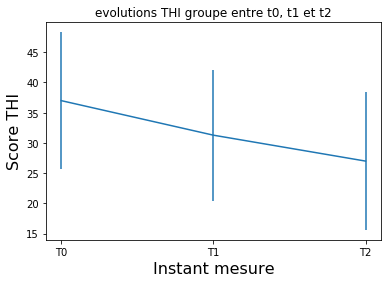

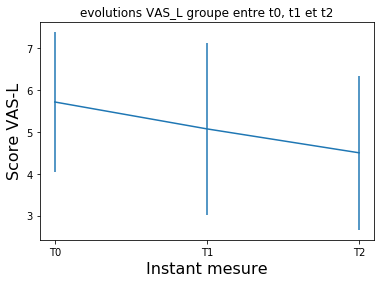

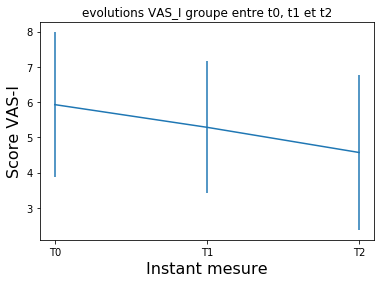

In [9]:
means=[]
stds=[]
for elm in dico_stats:
    means.append(np.mean(dico_stats[elm]))
    stds.append(np.std(dico_stats[elm]))

THI_m = means[:3]
EVA_I_m=means[3:6]
EVA_G_m=means[6:]

THI_s = stds[:3]
EVA_I_s=stds[3:6]
EVA_G_s=stds[6:]

plt.figure()
plt.errorbar(["T0","T1","T2"],THI_m, THI_s)
plt.title("evolutions THI groupe entre t0, t1 et t2")
plt.ylabel("Score THI", fontsize=16)
plt.xlabel("Instant mesure", fontsize=16)

plt.figure()
plt.errorbar(["T0","T1","T2"],EVA_I_m, EVA_I_s)
plt.title("evolutions VAS_L groupe entre t0, t1 et t2")
plt.ylabel("Score VAS-L", fontsize=16)
plt.xlabel("Instant mesure", fontsize=16)

plt.figure()
plt.errorbar(["T0","T1","T2"],EVA_G_m, EVA_G_s)
plt.title("evolutions VAS_I groupe entre t0, t1 et t2")
plt.ylabel("Score VAS-I", fontsize=16)
plt.xlabel("Instant mesure", fontsize=16)

# Affichage violin plot

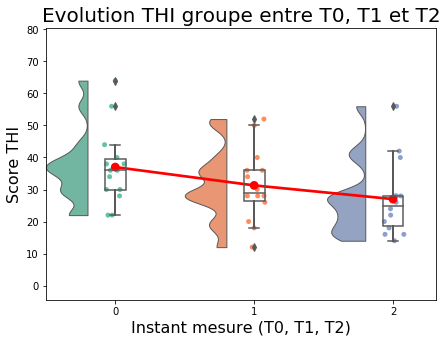

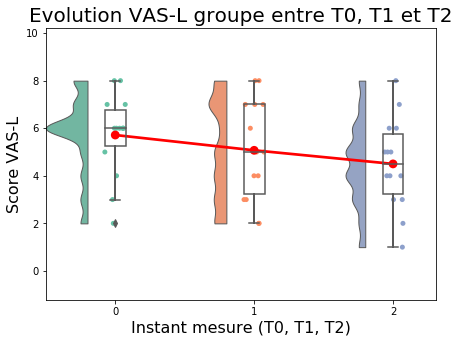

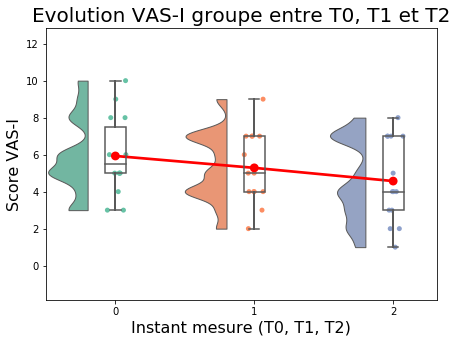

In [10]:
def make_me_a_rainbow(columns,title, descrip):  

    #columns est ddu type [[nom_colonne1, [data1]], [nom_colonne2, [data2],...]]
    l=[]
    li=[]
    for elm in columns:
        for eli in elm[1]:
            l.append(eli)
            li.append(elm[0])
    
    #print(l)
    #print(li)
    li2=[i for i in range(len(l))]

    columns = descrip

    df_ = pd.DataFrame(index=li2, columns=columns)
    df_ = df_.fillna(0) # with 0s rather than NaNs
    data = np.array([li,l]).T
    df = pd.DataFrame(data, index=li2, columns=columns)
    #print(df)
    #adding a red line connecting the groups' mean value (useful for longitudinal data)
    dx=columns[0]; dy=columns[1]; ort="v"; pal = "Set2"; sigma = .2
    f, ax = plt.subplots(figsize=(7, 5))

    ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                     width_viol = .6, ax = ax, orient = ort, jitter=0.08,
                   pointplot = True, point_size=5)
    ax.margins(0.3) 
    plt.xlabel(dx, fontsize=16)
    plt.ylabel(dy, fontsize=16)
    plt.title(title, fontsize = 20)
    
#Affichage THI
datas=[[0, dico_stats[keys[0]]], [1, dico_stats[keys[1]]], [2, dico_stats[keys[2]]]]
make_me_a_rainbow(datas,"Evolution THI groupe entre T0, T1 et T2", ["Instant mesure (T0, T1, T2)", "Score THI"])

#VAS-L
datas=[[0, dico_stats[keys[3]]], [1, dico_stats[keys[4]]], [2, dico_stats[keys[5]]]]
make_me_a_rainbow(datas,"Evolution VAS-L groupe entre T0, T1 et T2", ["Instant mesure (T0, T1, T2)", "Score VAS-L"])

#VAS-I
datas=[[0, dico_stats[keys[6]]], [1, dico_stats[keys[7]]], [2, dico_stats[keys[8]]]]
make_me_a_rainbow(datas,"Evolution VAS-I groupe entre T0, T1 et T2", ["Instant mesure (T0, T1, T2)", "Score VAS-I"])